In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

# Rosenbrock function

In [2]:
def rosenbrock(X, Y):
    return 100*(X**2 - Y)**2 + (1 - X)**2

In [3]:
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

### Contour Plot

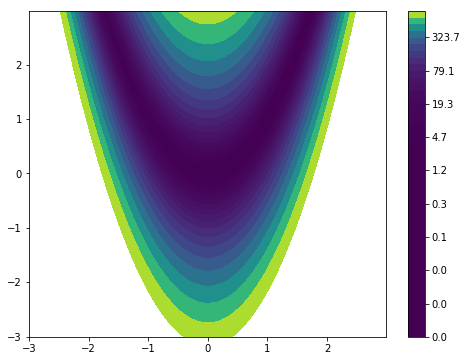

In [4]:
plt.figure(figsize=(8, 6))
CS = plt.contourf(X, Y, Z, np.logspace(-3, 3, 50))
cbar = plt.colorbar(CS)
plt.show()

# Simulated Annealing

In [71]:
class simulatedAnnealing(object):
    
    def __init__(self, temp, delTemp, freezPoint):
        self.temp = temp
        self.delTemp = delTemp
        self.freezPoint = freezPoint
        self.X = np.random.uniform(low=-2.78, high=2.78, size=2)
        
    def minFunction(self, X):
        return X[0]**2 + X[1]**2
    
    def prob(self, delF):
        return np.exp(-delF/self.temp)
    
    def randDels(self):
        return (np.random.random_sample(2) - 0.5)/100
    
    def inrange(self, X):
        if X[0] < 2.78 and X[0] > -2.78 and X[1] < 2.78 and X[1] > -2.78:
            return True
        else:
            return False
                
    def fit(self):
        while(self.temp > self.freezPoint):
            n_iterations = 10
            self.probableX = self.X
            self.minX = self.X
            
            while(n_iterations>0):
                n_iterations -= 1
                delX = self.randDels()
                newX = self.probableX + delX
                newVal = self.minFunction(newX)
                oldVal = self.minFunction(self.probableX)
                
                if newVal < oldVal and self.inrange(newX):
                    self.probableX = newX
                    self.minX = newX

                else:
                    probab = self.prob(newVal - oldVal)
                    if probab > 0.6 and self.inrange(newX):
                        self.probableX = newX
                
            self.X = self.minX
            self.temp -= self.delTemp         
            
    def results(self):
        return self.X, self.minFunction(self.X)

In [72]:
an = simulatedAnnealing(temp=100, delTemp=0.01, freezPoint=0.01)

In [73]:
an.fit()

In [74]:
an.results()

(array([ 0.00063134,  0.0016794 ]), 3.2189722878325389e-06)

In [76]:
avg = 0.0
for i in range(0, 10):
    an = simulatedAnnealing(temp=100, delTemp=0.01, freezPoint=0.001)
    an.fit()
    vals, res = an.results()
    avg += res
    print("Iteration ", i + 1, " : Result: ", res)
print("\nAverage Value : ", avg/30)

Iteration  1  : Result:  0.000169299527445
Iteration  2  : Result:  0.000529377488974
Iteration  3  : Result:  0.000341325756496
Iteration  4  : Result:  0.00129157442603
Iteration  5  : Result:  0.000105209871666
Iteration  6  : Result:  0.00149579614172
Iteration  7  : Result:  0.000820578382764
Iteration  8  : Result:  0.00597141069435
Iteration  9  : Result:  0.000978599596411
Iteration  10  : Result:  0.000120631091891

Average Value :  0.000394126765925
